In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
raw_data = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [ ]:
spotify_songs = pd.read_csv("spotify_songs.csv")
spotify_songs = spotify_songs.sample(n=2000, random_state=42)
spotify_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
30056,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,45,2vJ6FDg6ZMS56U8Wbiw2Oz,I Miss You,2019-02-05,Pop Hits 2000-2019,6mtYuOxzl58vSGnEDtZ9uB,edm,...,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347
11827,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,17,6LRJF97hgXHj8uMLHyCDbh,Who Are You (Remastered),1978-08-18,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,...,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707
23571,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,30,4IQn9XpweytNX2cUe2NBUH,Keepin' it Beefy,2015-01-19,Bluegrass Covers,37i9dQZF1DX56crgoe4TG3,r&b,...,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044
14741,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,35,0gGic19XvEiHKKWBV7M4YM,ONE,2020-01-15,Rock Hard,37i9dQZF1DWWJOmJ7nRx0C,rock,...,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196
25570,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,62,69g3CtOVg98TPOwqmI2K7Q,Ego Death,2015-06-26,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,...,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,33oVWYegPgHz4xes1bYUpk,Esperándola sin más,Ignasi Vidal,32,4SOrVF4WmQ9EGx9fVb74Vz,La Bella y la Bestia (Beauty and the Beast) [B...,2017-03-17,Post teen pop,7jQHOrErpLMStcUUSavQWR,pop,...,8,-8.459,1,0.0376,0.880000,0.000174,0.1050,0.221,97.272,194533
4105,6yOIdK2nKErlhyo5u7y81B,Dreamers,Savoir Adore,46,0CaWHOEBcnyUJ4OcrIvzWT,Our Nature,2012,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,...,3,-6.052,1,0.0319,0.081100,0.000179,0.0873,0.656,102.516,249261
28588,1pJ41kt60x9ddrOJJ7X450,Fix Me - Official Parookaville 2016 Anthem / R...,twoloud,34,4NOnkydnZRXbKxqx21cl5T,Fix Me (Official Parookaville 2016 Anthem / Ra...,2016-06-24,PAROOKAVILLE - Big Room,6vbHQdtfmexb0ptmBSpemm,edm,...,4,-3.791,0,0.0322,0.007160,0.000000,0.6140,0.226,126.071,193501
14032,2N2QYANz84q0gQrWp4QTg8,Doing Yoga,Kazy Lambist,58,0H5IAA55ON8uu1bLRmckO7,On You (Radio Edit) - Single,2016-08-01,Permanent wave 🌊,0QN4FeJQ1mpCygRg9r2JIK,rock,...,4,-6.820,0,0.0922,0.214000,0.001120,0.3890,0.318,108.993,291573


In [ ]:
spotify_songs.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

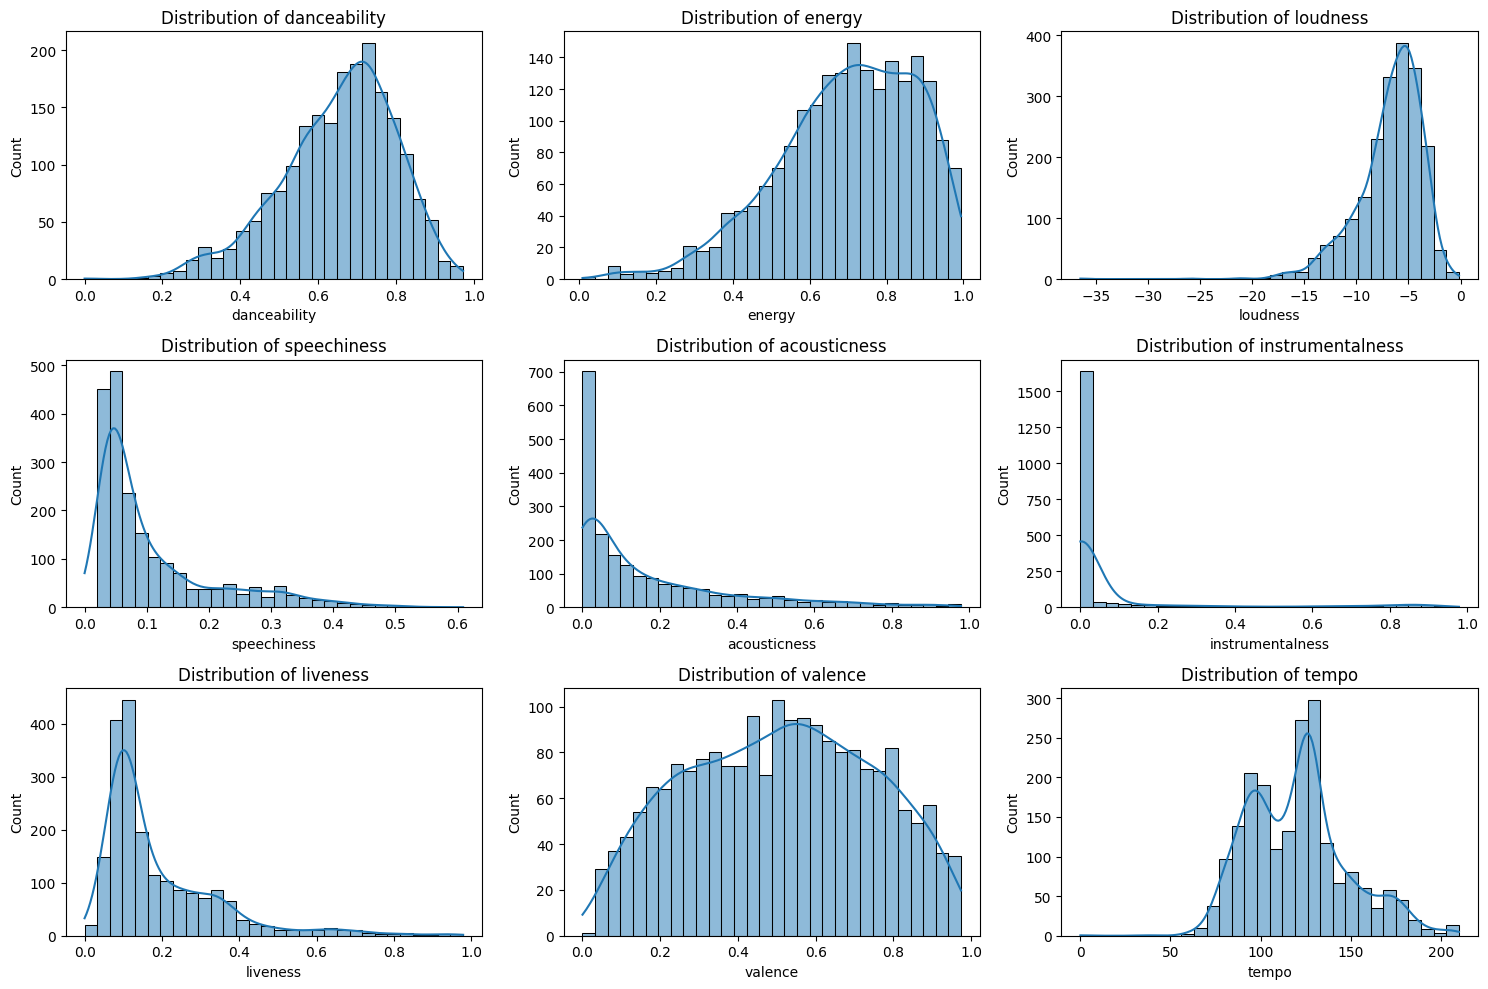

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols = 3, figsize=(15,10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(spotify_songs[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize everything to scale from 0 to 1

scaler = MinMaxScaler()
spotify_songs_scaled = scaler.fit_transform(spotify_songs[features])
spotify_songs_scaled

array([[0.53497942, 0.79205972, 0.79198988, ..., 0.08335036, 0.42607803,
        0.82804857],
       [0.66975309, 0.66222385, 0.69054299, ..., 0.10827375, 0.50205339,
        0.74404275],
       [0.65843621, 0.7606151 , 0.8611157 , ..., 0.12972421, 0.95687885,
        0.41172132],
       ...,
       [0.51131687, 0.67743899, 0.8999835 , ..., 0.62717058, 0.23203285,
        0.59986963],
       [0.75308642, 0.76264378, 0.81666392, ..., 0.39734423, 0.32648871,
        0.51860928],
       [0.77160494, 0.55977522, 0.78161963, ..., 0.113381  , 0.47125257,
        0.66643193]])

In [ ]:
spotify_songs_scaled = pd.DataFrame(spotify_songs_scaled, columns=features)
spotify_songs_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.534979,0.792060,0.791990,0.070936,0.005015,0.000014,0.083350,0.426078,0.828049
1,0.669753,0.662224,0.690543,0.083908,0.270684,0.003197,0.108274,0.502053,0.744043
2,0.658436,0.760615,0.861116,0.262726,0.679265,0.000000,0.129724,0.956879,0.411721
3,0.409465,0.971598,0.939566,0.074384,0.000006,0.000000,0.309499,0.533881,0.428313
4,0.459877,0.625708,0.778374,0.530378,0.035853,0.000743,0.248212,0.267967,0.319294
...,...,...,...,...,...,...,...,...,...
1995,0.330247,0.402552,0.771579,0.061741,0.898876,0.000178,0.107252,0.226899,0.462839
1996,0.620370,0.896537,0.837790,0.052381,0.082840,0.000183,0.089173,0.673511,0.487790
1997,0.511317,0.677439,0.899983,0.052874,0.007314,0.000000,0.627171,0.232033,0.599870
1998,0.753086,0.762644,0.816664,0.151396,0.218590,0.001144,0.397344,0.326489,0.518609


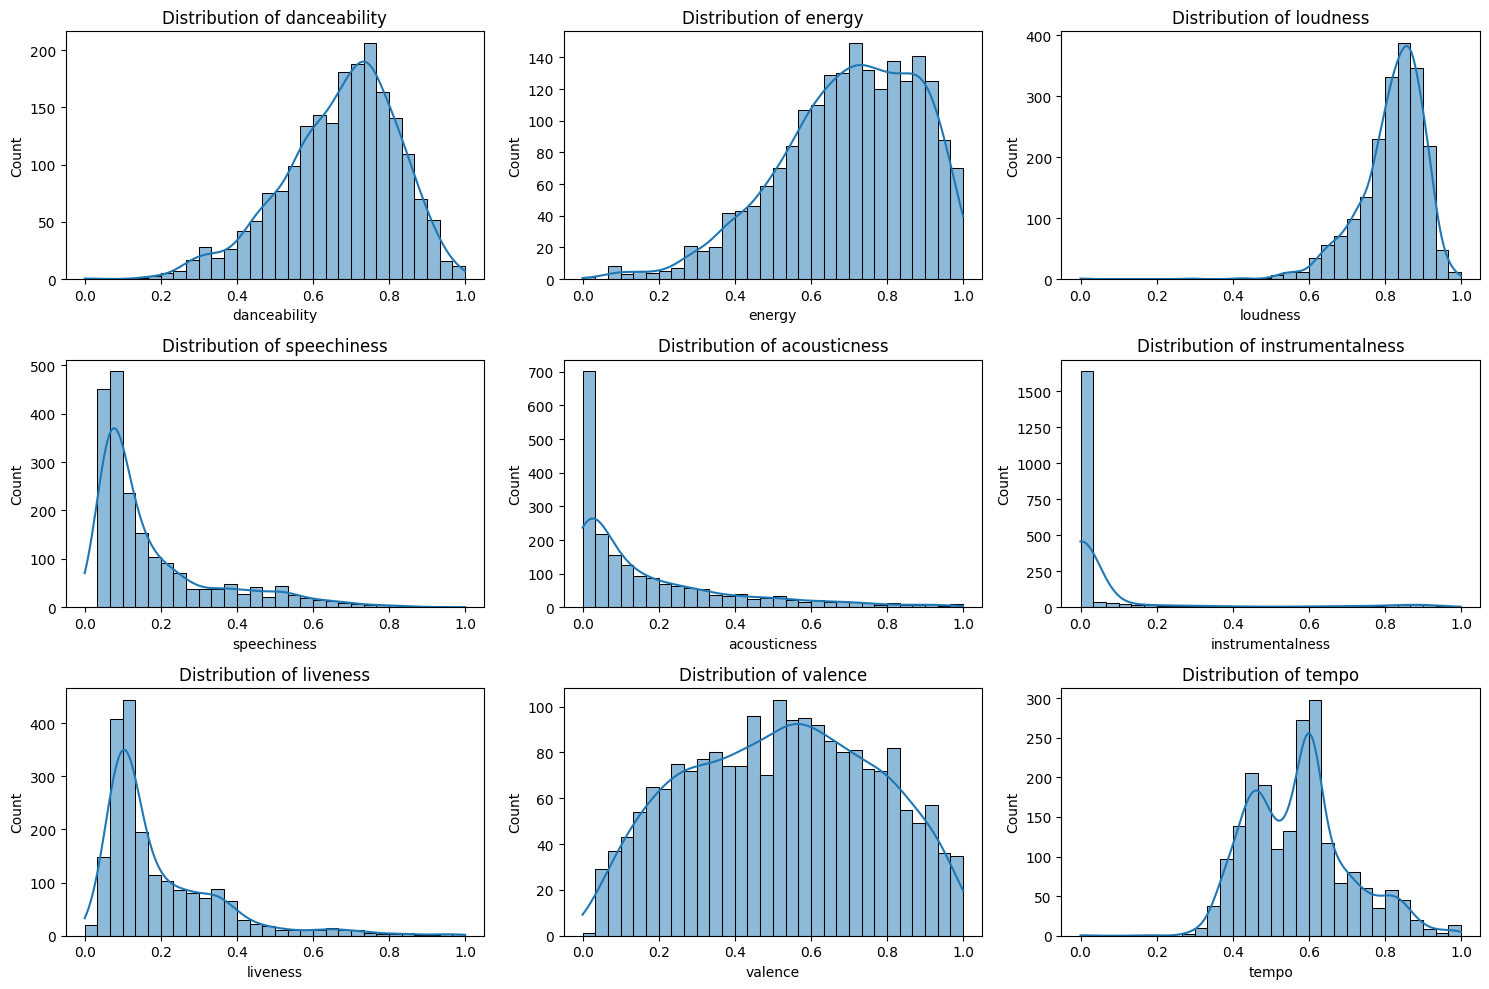

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols = 3, figsize=(15,10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(spotify_songs_scaled[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


In [ ]:
# determine the top 6 most important features using recursive feature elimination
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# dummy target variable filled with ones
dummy_y = np.ones(spotify_songs_scaled.shape[0])

# apply RFE
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=6)
x_selected = selector.fit_transform(spotify_songs_scaled, dummy_y)

In [ ]:
selected_features = np.array(features)[selector.support_]
print(f"The top 6 features are: {selected_features}")

The top 6 features are: ['speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo']


In [ ]:
from sklearn.cluster import KMeans

# Inertia is a metric used to evaluate the quality of clusters created by the K-Means algorithm
inertia = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(x_selected)
  inertia.append(kmeans.inertia_)


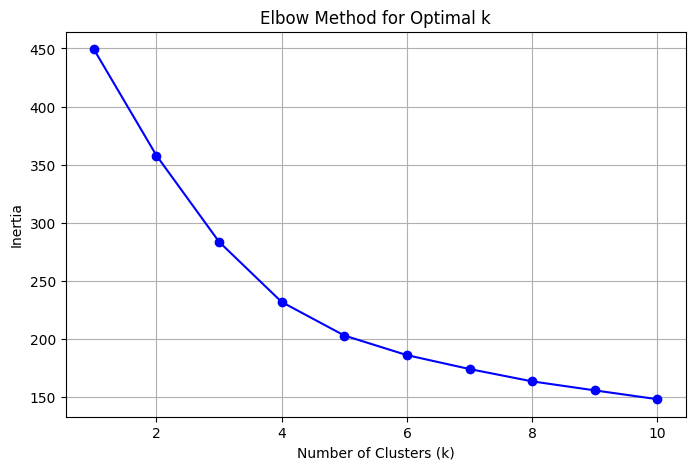

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [ ]:
pip install kneed

In [ ]:
# From the plot, the inertia plateaus at k=4.
from kneed import KneeLocator

kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = int(kl.elbow)
optimal_k

4

In [ ]:
# fit final k-means with top 6 features
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(x_selected)
final_labels

array([3, 3, 0, ..., 3, 3, 0], dtype=int32)

In [ ]:
# calculate the quality of the clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score

# we use the silhouette (want over 0.5 or higher score) and davies (want smallest score)

silhouette_avg = silhouette_score(x_selected, final_labels)
print(f"The average silhouette score is: {silhouette_avg}")

davies_avg = davies_bouldin_score(x_selected, final_labels)
print(f"The average davies score is: {davies_avg}")

The average silhouette score is: 0.25877175644370104
The average davies score is: 1.246732406273419


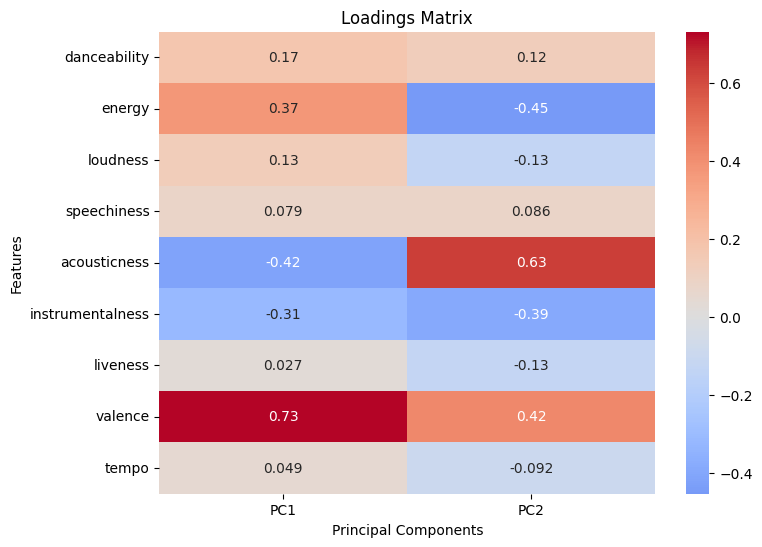

In [ ]:
# Our K means isn't very good... Apparently a lot of the clusters are overlapping

# Let's reassess feature selection with PCA (principal component analysis)
# PCA reduces dimensionality while preserving variance

from sklearn.decomposition import PCA

# 2 dimensions
pca_2d = PCA(n_components=2)
pca_transformed = pca_2d.fit_transform(spotify_songs_scaled)

# loadings matrix describes the relationship between the original features and the 2 principal components
loadings = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=features)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title('Loadings Matrix')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

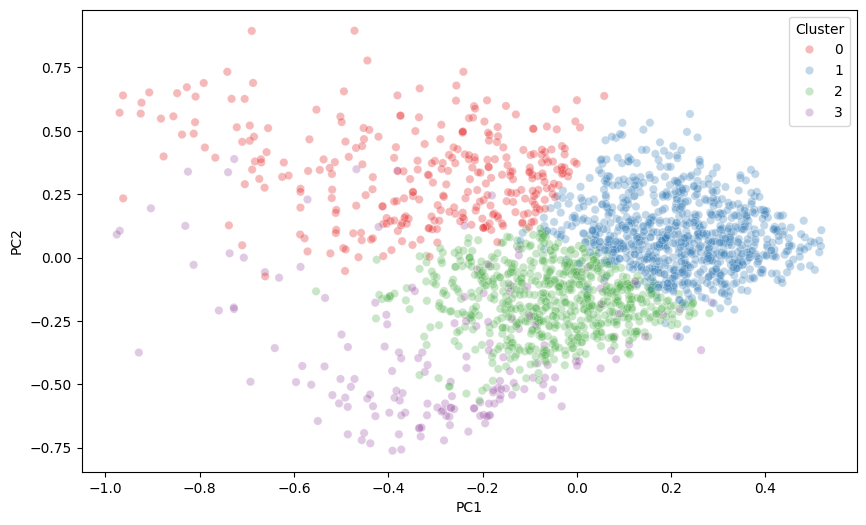

In [ ]:
# From the heatmap, Valence and Acousticness have the strongest influence for PC1 and 2

df_pca_2d = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

df_pca_2d['Cluster'] = final_labels

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.3)


In [ ]:
import plotly.express as px

pca_3d = PCA(n_components=3)
pca_transformed = pca_3d.fit_transform(spotify_songs_scaled)

df_pca_3d = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = final_labels

fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D Scatter Plot of PCA Components',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})


fig.show()

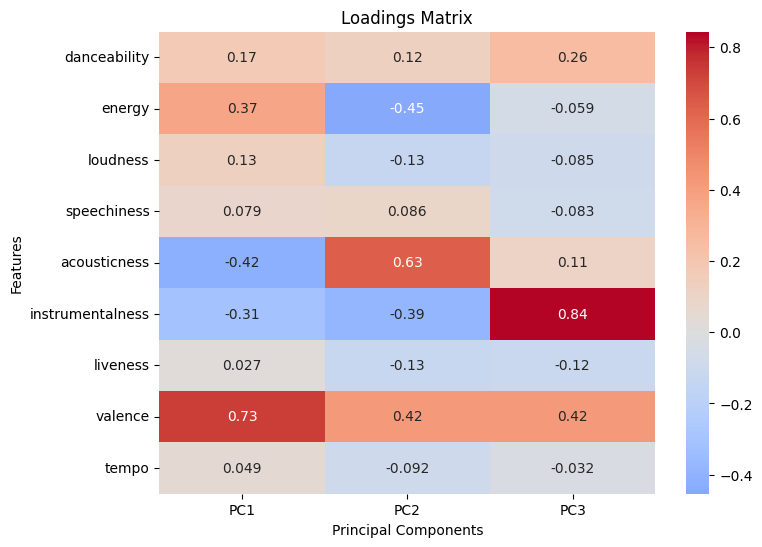

In [ ]:
loadings = pd.DataFrame(pca_3d.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title('Loadings Matrix')
plt.show()

In [ ]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(pca_transformed)

In [ ]:
# Evaluate the clustering results with PCA 3 components
silhouette_avg = silhouette_score(pca_transformed, final_labels)
davies_avg = davies_bouldin_score(pca_transformed, final_labels)

print(f"The average silhouette score is: {silhouette_avg}")
print(f"The average davies score is: {davies_avg}")

The average silhouette score is: 0.39031467275772475
The average davies score is: 0.8304040399258555


In [ ]:
pca_4d = PCA(n_components=4)
pca_transformed = pca_4d.fit_transform(spotify_songs_scaled)
df_pca_5d = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca_5d['Cluster'] = final_labels


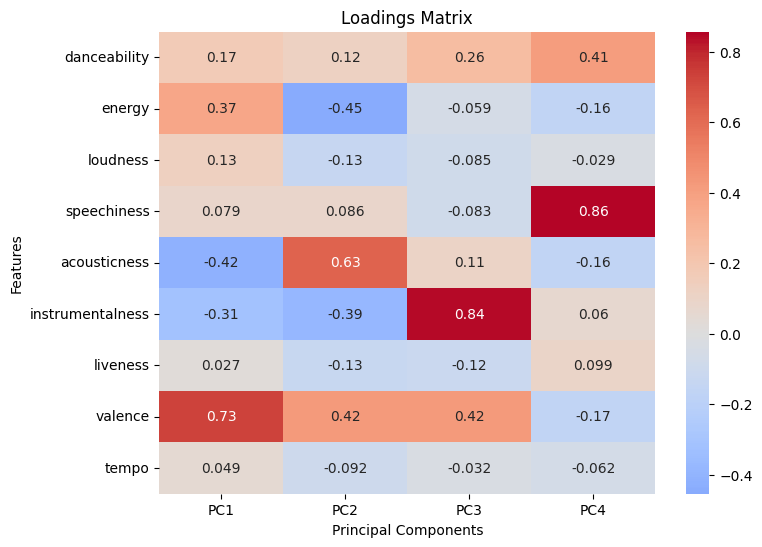

In [ ]:
loadings = pd.DataFrame(pca_4d.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4',], index=features)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title('Loadings Matrix')
plt.show()

In [ ]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(pca_transformed)

In [ ]:
# Evaluate the clustering results with PCA 4 components
silhouette_avg = silhouette_score(pca_transformed, final_labels)
davies_avg = davies_bouldin_score(pca_transformed, final_labels)

print(f"The average silhouette score is: {silhouette_avg}")
print(f"The average davies score is: {davies_avg}")

The average silhouette score is: 0.34317084766274947
The average davies score is: 0.9220942824863109
